<h2>Project #2 - Web Scraping Billboard And Spotify API</h2>
Sergey Khegay

### Import necessary Libraries

In [1]:
# importing the libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests
import csv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
import seaborn as sns
from matplotlib import pyplot as plt 

### Define Functions and Lists for Web Scarping

Define function to web scrape **artist name's** from given Billboard link and store it in **Artists** list.

In [2]:
Artists = []
def webscraping_name(link_url,list_name):
    url_content = requests.get(link_url)
    soup = BeautifulSoup(url_content.content, 'html.parser')
    name_list = soup.find_all('span', class_="chart-element__information__artist")
    for i in name_list:
        list_name.append(i.get_text())
    print('Artist name\'s  web scraped.')

Define function to web scrape **name of the songs**  from given Billboard link and store it in **Songs** list.

In [3]:
Songs = []
def webscraping_songs(link_url,list_name):
    url_content = requests.get(link_url)
    soup = BeautifulSoup(url_content.content, 'html.parser')
    name_list = soup.find_all('span', class_="chart-element__information__song")
    for i in name_list:
        list_name.append(i.get_text())
    print('Track name\'s  web scraped.')

### Run Web Scraping Functions and Create Dataframe

Define **Billboard URL** and run the funtions.

In [4]:
url = "https://www.billboard.com/charts/billboard-global-200"
webscraping_name(url,Artists)
webscraping_songs(url,Songs)

Artist name's  web scraped.
Track name's  web scraped.


Create **Billboard dataframe** and assign lists to relative columns.

In [5]:
df_billboard = pd.DataFrame()
df_billboard['Song'] = Songs
df_billboard['Artist'] = Artists
#df_billboard

### Define Spotify Credentials and Access

In [6]:
client_id = '2ebbbedc6bd84d989c84ca1222925180'#{spotify client id}
client_secret = '8740693f8ff8484b9218408e79620cca'#{spotify secret id}
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

### Define Functions and Lists to Return Information Using API

Define function to get **track uri** from Spotify request and store data in the **track_uris** list.

In [7]:
#Track uri List
track_uris = []

In [8]:
def get_track_uris(song_list,artist_list,uri_list):
    for i in range(0, len(song_list)):
        song = str(artist_list[i])+','+str(song_list[i])
        search = sp.search(song)
        if search['tracks']['total']==0:
            song = str(song_list[i])
            search = sp.search(song)
        track_uri = search['tracks']['items'][0]['uri']
        uri_list.append(track_uri)
    print('Track uris has been added to list.')

Define function to request **audio features** and store it in relative lists using **track uri**.

In [9]:
#Audio Features List
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
valence = []
tempo = []

In [10]:
def audio_features(uri_list):
    for i in uri_list:
        features = sp.audio_features(i)
        acousticness.append(features[0]['acousticness'])
        danceability.append(features[0]['danceability'])
        energy.append(features[0]['energy'])
        instrumentalness.append(features[0]['instrumentalness'])
        liveness.append(features[0]['liveness'])
        loudness.append(features[0]['loudness'])
        speechiness.append(features[0]['speechiness'])
        valence.append(features[0]['tempo'])
        tempo.append(features[0]['valence'])
    print('Audio features extracted.')

Define function to request additional information including **album, track popularity, release data**, and whether the track is **explicit**. 

In [11]:
#Track Info List
popularity = []
album_name = []
popularity = []
explicit = []
release_date = []

In [12]:
#Additional Track Information
def track_information(uri_list):
    for i in uri_list:
        track_info = sp.track(i)
        popularity.append(track_info['popularity'])
        album_name.append(track_info['album']['name'])
        explicit.append(track_info['explicit'])
        release_date.append(track_info['album']['release_date'])
    print('Additional track information extracted.')

### Run API Functions Get Track Infromation From Spotify and Create Dataframe
Request all information using Spotify API request.

In [13]:
get_track_uris(Songs,Artists,track_uris)
track_information(track_uris)
audio_features(track_uris) 

Track uris has been added to list.
Additional track information extracted.
Audio features extracted.


Create **Spotify dataframe** and assign lists to relative columns.

In [14]:
df_spotify = pd.DataFrame()
df_spotify['Track_URI'] = track_uris
df_spotify['Explicit'] = explicit
df_spotify['Album Name'] = album_name
df_spotify['Release Date'] = release_date
df_spotify['Popularity'] = popularity
df_spotify['Acousticness'] = acousticness
df_spotify['Danceability'] = danceability
df_spotify['Energy'] = energy
df_spotify['Instrumentalness'] = instrumentalness
df_spotify['Liveness'] = liveness
df_spotify['Loudness'] = loudness
df_spotify['Speechiness'] = speechiness
df_spotify['Valence'] = valence
df_spotify['Tempo'] = tempo

### Combine Dataframes, Produce Descriptive Statisic ,and Export Dataframe to CSV

Combine **Billboard** and **Spotify** Dataframes.

In [15]:
final_df = pd.concat([df_billboard, df_spotify], axis=1, sort=False)
final_df

,Song,Artist,Track_URI,Explicit,Album Name,Release Date,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
0,All I Want For Christmas Is You,Mariah Carey,spotify:track:0bYg9bo50gSsH3LtXe2SQn,False,Merry Christmas,1994-11-01,97,0.16400,0.336,0.627,0.000000,0.0708,-7.463,0.0384,150.273,0.3500
1,Dakiti,Bad Bunny & Jhay Cortez,spotify:track:74sMXgFr375v5R2h2ce4fr,False,"The Impossible Game Soundtrack, Vol. 50",2020-12-02,4,0.09500,0.465,0.553,0.903000,0.5360,-9.859,0.0313,110.081,0.0622
2,Last Christmas,Wham!,spotify:track:2FRnf9qhLbvw8fu4IBXx78,False,LAST CHRISTMAS,1984-11-29,88,0.18900,0.735,0.478,0.000002,0.3550,-12.472,0.0293,107.682,0.9470
3,Blinding Lights,The Weeknd,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,False,After Hours,2020-03-20,97,0.00146,0.514,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.3340
4,Dynamite,BTS,spotify:track:0t1kP63rueHleOhQkYSXFY,False,Dynamite (DayTime Version),2020-08-28,93,0.01120,0.746,0.765,0.000000,0.0936,-4.410,0.0993,114.044,0.7370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Gurenge,LiSA,spotify:track:19Qu5BOV1Y8nDrzgYavYdB,False,"Gurenge (From ""Demon Slayer: Kimetsu no Yaiba"")",2019-05-10,70,0.02760,0.656,0.654,0.000000,0.1090,-7.031,0.0346,135.044,0.6120
196,ily,surf mesa Featuring Emilee,spotify:track:62aP9fBQKYKxi7PDXwcUAS,False,ily (i love you baby) (feat. Emilee),2019-11-26,88,0.06860,0.674,0.774,0.001880,0.3930,-7.567,0.0892,112.050,0.3300
197,Ice Cream,BLACKPINK X Selena Gomez,spotify:track:4JUPEh2DVSXFGExu4Uxevz,False,THE ALBUM,2020-10-02,80,0.03740,0.785,0.719,0.000108,0.0519,-3.886,0.3540,159.953,0.8870
198,Bang!,AJR,spotify:track:53BHUFdQphHiZUUG3nx9zn,False,Bang!,2020-02-12,79,0.01830,0.740,0.516,0.000000,0.0558,-6.233,0.0507,139.918,0.6980


Using **.describe()** function produce descriptive Statistics.

In [16]:
final_df.describe()

,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,79.855000,0.306458,0.668985,0.592301,0.040702,0.162955,-7.271305,0.103205,122.246765,0.563642
std,21.799543,0.302600,0.158965,0.200511,0.177302,0.134396,3.534202,0.097038,30.571660,0.245559
min,0.000000,0.000387,0.162000,0.074200,0.000000,0.031400,-20.786000,0.023200,67.196000,0.060500
25%,81.000000,0.054275,0.587750,0.470500,0.000000,0.086525,-8.769750,0.038250,95.675750,0.357000
50%,87.000000,0.190500,0.700500,0.623500,0.000000,0.112000,-6.392500,0.057700,122.048500,0.576500
75%,91.000000,0.556500,0.787500,0.732250,0.000058,0.187000,-4.771750,0.133000,142.160000,0.763000
max,99.000000,0.987000,0.965000,0.973000,0.960000,0.907000,-1.746000,0.481000,202.899000,0.976000


Store Results as **billboard.csv** file.

In [17]:
final_df.to_csv('billboard.csv')

### Data Visualization

Visualization of **Top 10 Artist by Track Popularity**

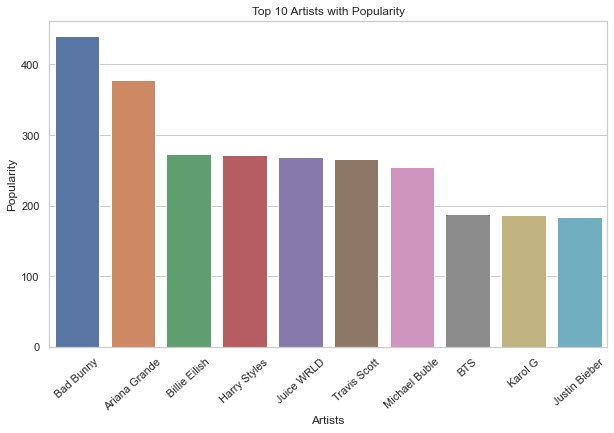

In [30]:
plt.figure(figsize=(10, 6))
x = final_df.groupby("Artist")["Popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top 10 Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 42)
plt.show()

Visualization of **Top 20 Artist with Most Songs in Billboard**

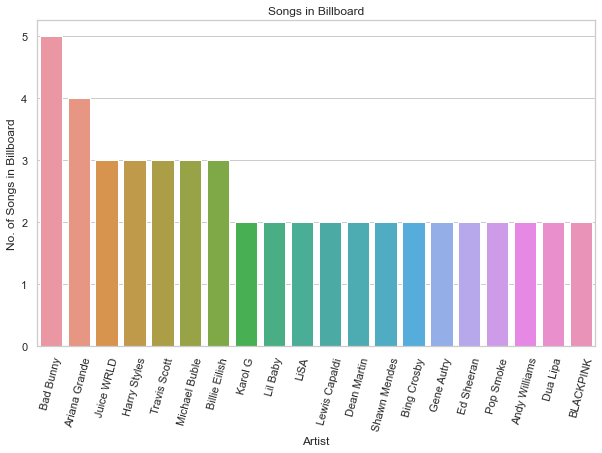

In [23]:
f, ax = plt.subplots(figsize=(10, 6))
artistsCounts = final_df.groupby('Artist')['Artist'].count().sort_values(ascending=False)[:20]
sns.barplot(x=artistsCounts.index, y=artistsCounts.values)
plt.xticks(rotation=75)
plt.ylabel('No. of Songs in Billboard')
plt.xlabel('Artist')
plt.title('Songs in Billboard')
plt.show()

**Scatterplot Matrix** of Various Features in Relation to Track having Explicit Lyrics

<Figure size 1152x576 with 0 Axes>

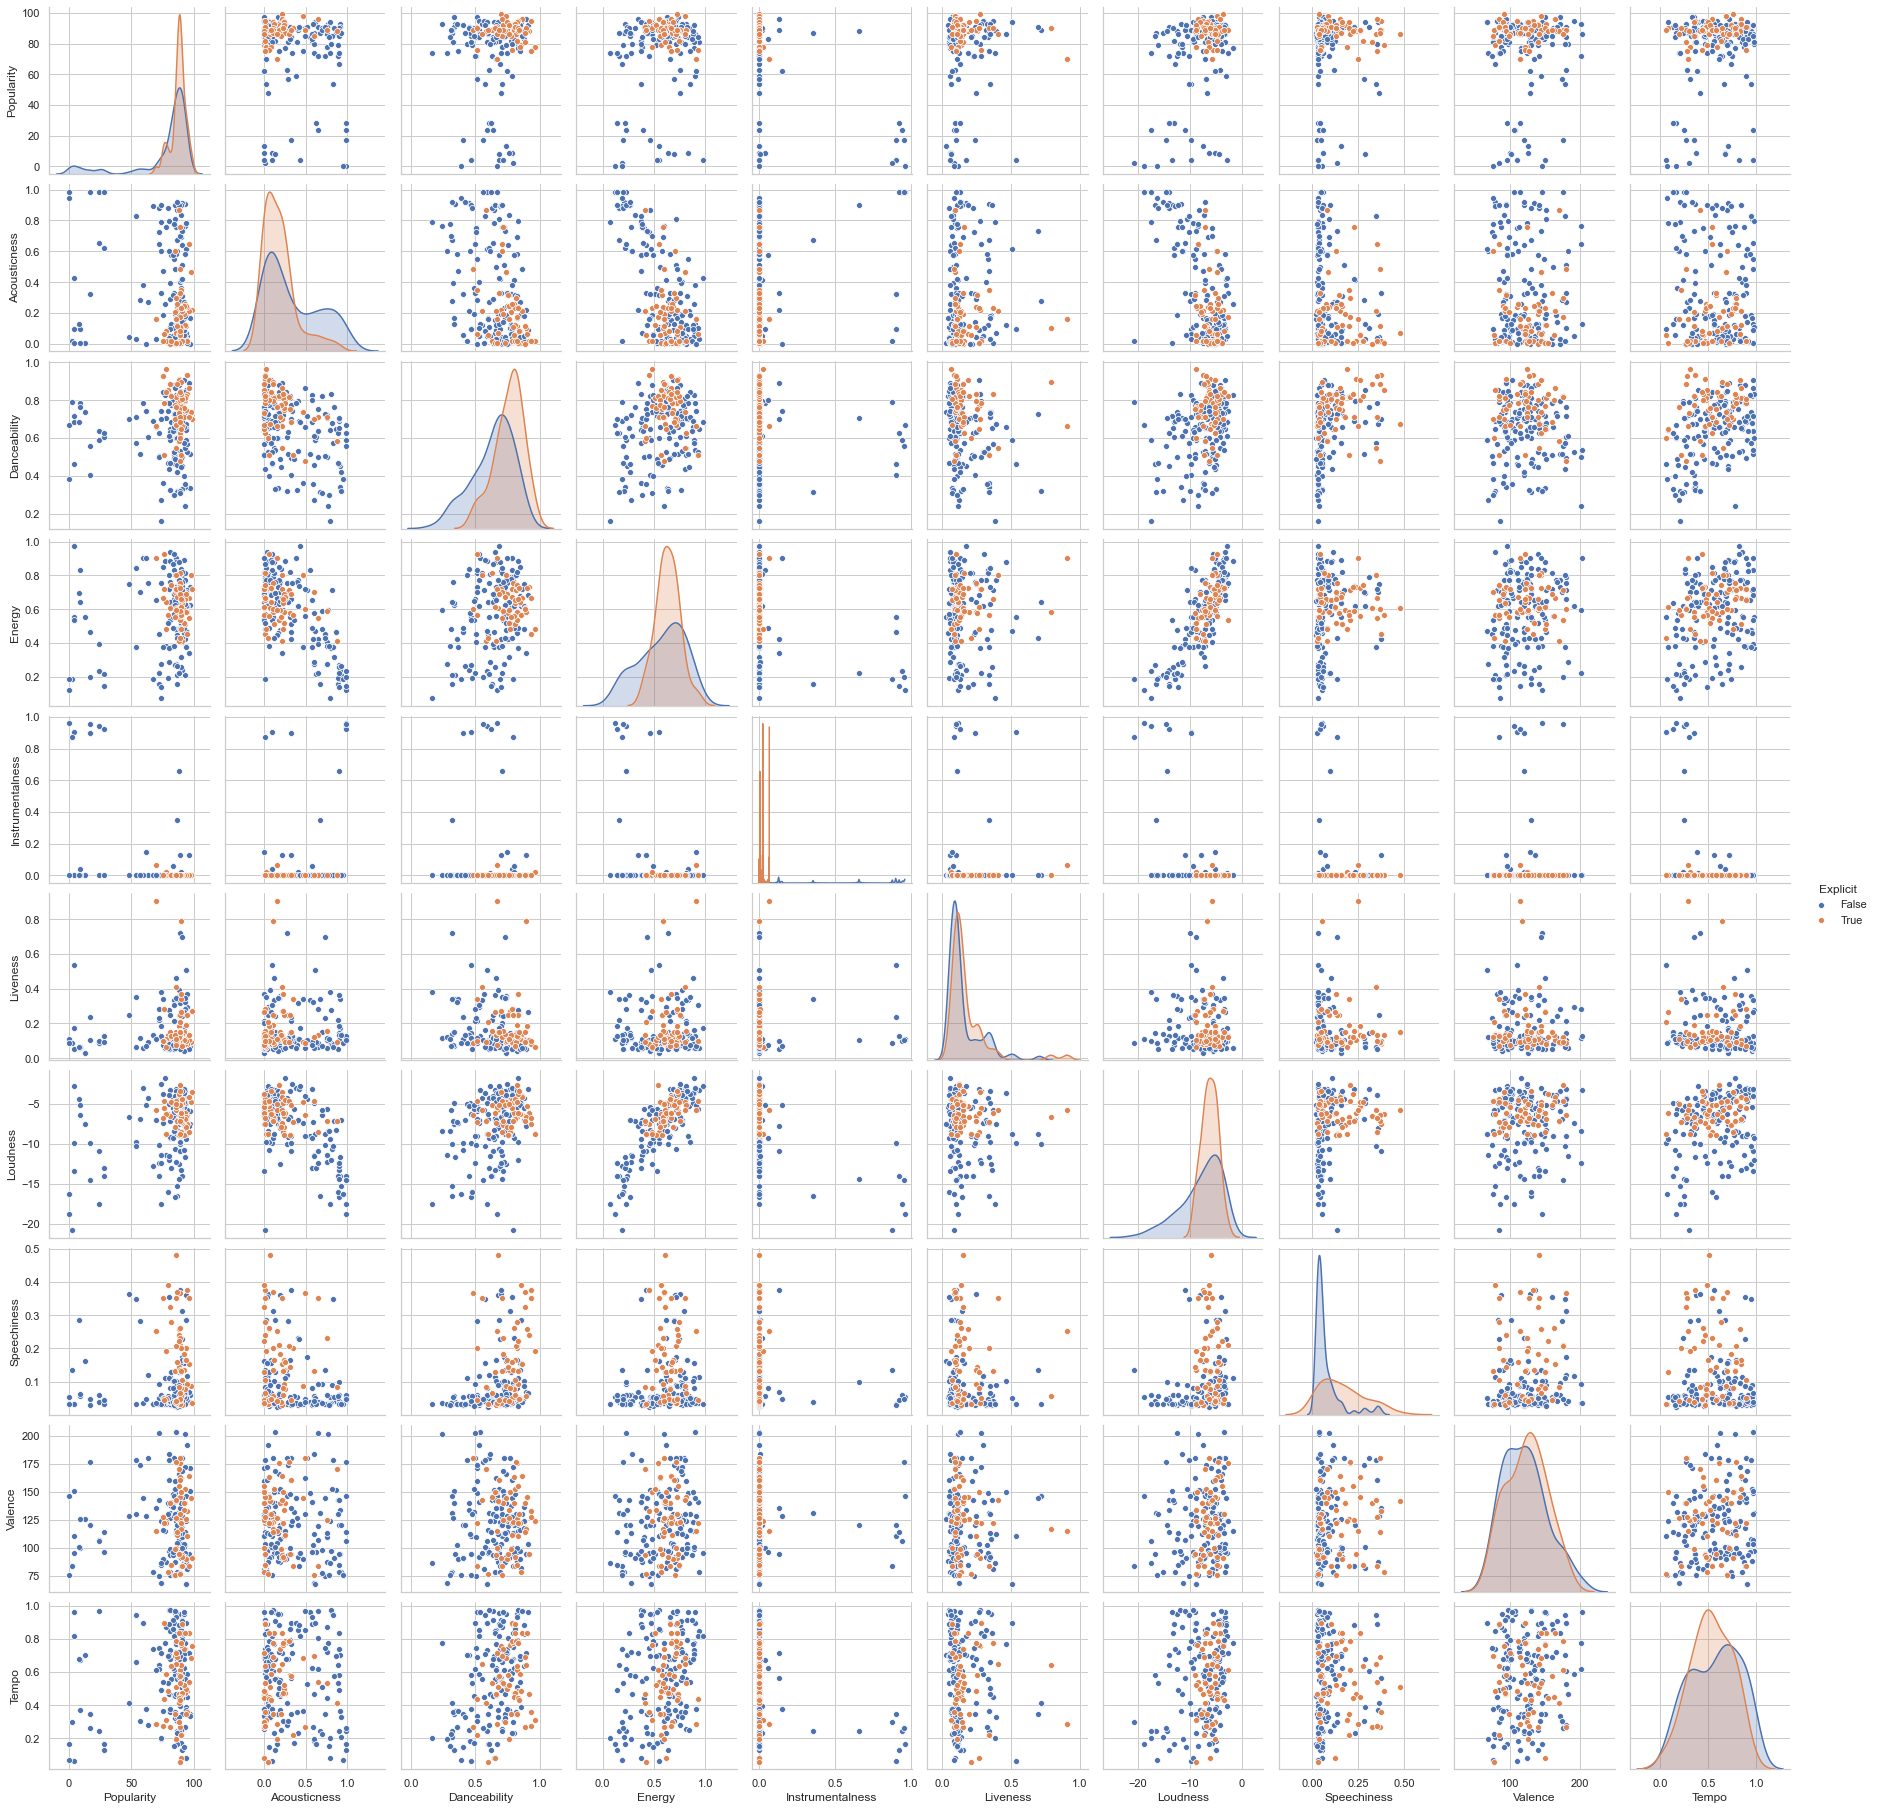

In [20]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ['Popularity','Acousticness','Danceability','Energy','Instrumentalness','Liveness',
        'Loudness','Speechiness','Valence','Tempo','Explicit']
sns.pairplot(final_df[cols], hue = 'Explicit', height = 2.5)
plt.show()

Interactive Scatterplot Matrix Using **plotly**.

Disclaimer: If error occurs, uncomment the first line of code.

In [21]:
#!pip install plotly
import plotly.express as px
df = px.data.iris()
cols = ['Popularity','Acousticness','Danceability','Energy','Instrumentalness','Liveness','Loudness','Speechiness','Valence','Tempo']
fig = px.scatter_matrix(final_df,
    dimensions=cols,
    color="Explicit")
#fig.show()